## **Projeto: Detecção de Risco de Saúde Mental em Estudantes com ML**

## Objetivos

* Pré-processar e gerar conjuntos de dados de treinamento e teste
* Treinar e refinar modelos de regressão logística
* Interpretar modelos de regressão logística treinados
* Avaliar modelos de regressão logística treinados

**Import and Reading the data**

In [83]:
import pandas as pd 
import numpy as np 
import seaborn as srn 
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import matplotlib.patches as mpatches
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler 
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
# Use the inline backend to generate the plots within the browser
%matplotlib inline
from scipy import stats

### Análise Exploratória de Dados (EDA) e Engenharia de Recursos
Antes de começarmos a implementar o modelo, é essencial examinar o conjunto de dados e selecionar cuidadosamente os recursos que servirão como entradas para o modelo.

### Carregar e explorar o conjunto de dados

Primeiro, vamos carregar o conjunto de dados como um dataframe `Pandas` e realizar algumas tarefas básicas de EDA nele.

Quando começamos a trabalhar com um novo conjunto de dados, é frequentemente útil inspecionar as primeiras linhas do conjuntos de dados. Isto mostrará que tipo de dados estamos analisando e iremos trabalhar no conjunto de daods. Isso servirá como referênica para as visualizações que produziremos em seguida.

In [2]:
students = pd.read_csv('Student Depression Dataset.csv')
students = pd.DataFrame(students)
students.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
students.shape

(27901, 18)

In [4]:
len(students)

27901

In [5]:
students.dtypes 


id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [6]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

#### Como podemos ver nas saídas acima nosso dataset contém 18 colunas no total, repartidas entre 9 númericas e 9 categóricas. 

### Em seguida passamos para a análise exploratória dos dados

## **Exploratory Data Analysis** 

In [7]:
students.describe(include='all')

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27898.000000,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,NaN,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,NaN,NaN,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,NaN,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,3.139867,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,1.437347,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,2.000000,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,3.000000,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,1.000000


**Statistical summary** 

In [8]:
numeric_df = students.select_dtypes(include = ['float64'])
numeric_df

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
0,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0
1,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0
2,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0
3,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0
4,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
27896,27.0,5.0,0.0,5.75,5.0,0.0,7.0,1.0
27897,27.0,2.0,0.0,9.40,3.0,0.0,0.0,3.0
27898,31.0,3.0,0.0,6.61,4.0,0.0,12.0,2.0
27899,18.0,5.0,0.0,6.88,2.0,0.0,10.0,5.0


In [9]:
numeric_df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000


In [10]:
numeric_df.corr()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
Age,1.000000,-0.075803,0.002015,0.005056,0.009235,-0.000432,-0.032928,-0.095026
Academic Pressure,-0.075803,1.000000,-0.022231,-0.022239,-0.110988,-0.024945,0.095970,0.151706
Work Pressure,0.002015,-0.022231,1.000000,-0.050896,-0.021145,0.770652,-0.005468,0.001883
CGPA,0.005056,-0.022239,-0.050896,1.000000,-0.044062,-0.053631,0.002604,0.005885
Study Satisfaction,0.009235,-0.110988,-0.021145,-0.044062,1.000000,-0.021907,-0.036441,-0.065107
Job Satisfaction,-0.000432,-0.024945,0.770652,-0.053631,-0.021907,1.000000,-0.005222,0.005248
Work/Study Hours,-0.032928,0.095970,-0.005468,0.002604,-0.036441,-0.005222,1.000000,0.075283
Financial Stress,-0.095026,0.151706,0.001883,0.005885,-0.065107,0.005248,0.075283,1.000000


In [11]:
CGPA_corr = numeric_df.corr()['CGPA']

CGPA_corr

Age                   0.005056
Academic Pressure    -0.022239
Work Pressure        -0.050896
CGPA                  1.000000
Study Satisfaction   -0.044062
Job Satisfaction     -0.053631
Work/Study Hours      0.002604
Financial Stress      0.005885
Name: CGPA, dtype: float64

In [12]:
categorical_df = students.select_dtypes(include=['object'])
categorical_df.head(5)

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,Male,Visakhapatnam,Student,5-6 hours,Healthy,B.Pharm,Yes,No
1,Female,Bangalore,Student,5-6 hours,Moderate,BSc,No,Yes
2,Male,Srinagar,Student,Less than 5 hours,Healthy,BA,No,Yes
3,Female,Varanasi,Student,7-8 hours,Moderate,BCA,Yes,Yes
4,Female,Jaipur,Student,5-6 hours,Moderate,M.Tech,Yes,No


In [13]:
categorical_df.describe()

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,2
top,Male,Kalyan,Student,Less than 5 hours,Unhealthy,Class 12,Yes,No
freq,15547,1570,27870,8310,10317,6080,17656,14398


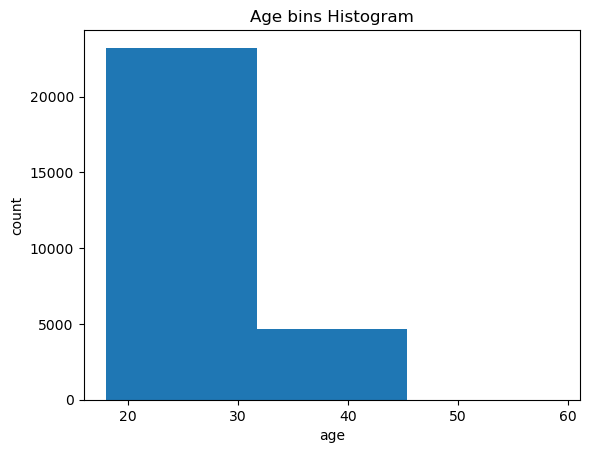

In [14]:
# Plot the histogram of the 'Age' column. 
plt.hist(students['Age'], bins=3)
# Set x/y labels and plot title
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age bins Histogram')

plt.show()

**Bining the data**

In [15]:
bins = np.linspace(min(students['Age']), max(students['Age']), 4)

group_names = ['Young', 'Adult', 'Senior']

students['Age-binned'] = pd.cut(students['Age'], bins, labels=group_names, include_lowest=True) 
students[['Age', 'Age-binned']].head(5)


,Age,Age-binned
0,33.0,Adult
1,24.0,Young
2,31.0,Young
3,28.0,Young
4,25.0,Young


In [16]:
from matplotlib import pyplot

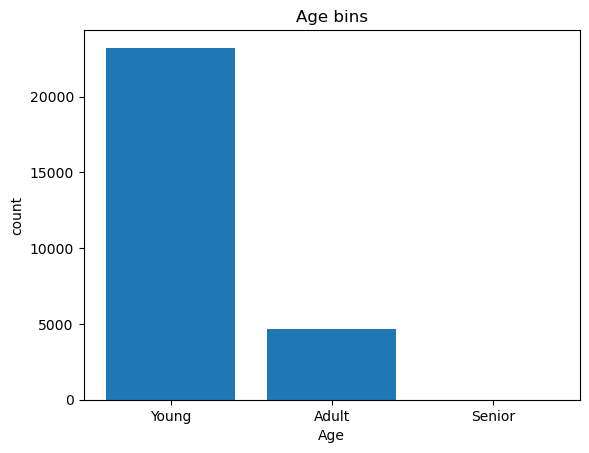

In [17]:
pyplot.bar(group_names, students['Age-binned'].value_counts())

plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age bins')

plt.show()

**Data missing**

In [18]:
print(students.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
Age-binned                               0
dtype: int64


In [19]:
students.dropna(subset=['Financial Stress'], axis=0, inplace=True) 
print(students.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Age-binned                               0
dtype: int64


**Visualizing the Data -  Pivote Tables**

In [20]:
pivot_table = pd.pivot_table(students, values='CGPA', index='Age-binned', columns='Degree', aggfunc='mean')
pivot_table

C:\Users\micro\AppData\Local\Temp\ipykernel_1636\1037892245.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(students, values='CGPA', index='Age-binned', columns='Degree', aggfunc='mean')


Degree,B.Arch,B.Com,B.Ed,B.Pharm,B.Tech,BA,BBA,BCA,BE,BHM,...,MA,MBA,MBBS,MCA,MD,ME,MHM,MSc,Others,PhD
Age-binned,,,,,,,,,,,,,,,,,,,,,
Young,7.632443,7.684094,7.847098,7.700984,7.584271,7.786404,7.726030,7.792000,7.499211,7.647824,...,8.052854,7.694208,7.623072,7.548783,7.814687,7.302192,7.763286,7.524696,7.521034,7.780490
Adult,7.492202,7.582582,7.856549,7.747059,7.812235,7.558182,7.640426,7.699021,7.442229,7.664052,...,7.934956,7.611980,7.352732,7.613529,7.463529,7.147949,7.175882,7.462557,7.916667,7.476127
Senior,NaN,NaN,9.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.260000,6.830000,8.920000,NaN,NaN,NaN,NaN,7.120000


In [21]:
pivot_table = pd.pivot_table(students, values='CGPA', index='Age-binned', columns='Gender', aggfunc='mean')
pivot_table

C:\Users\micro\AppData\Local\Temp\ipykernel_1636\4018586132.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(students, values='CGPA', index='Age-binned', columns='Gender', aggfunc='mean')


Gender,Female,Male
Age-binned,,
Young,7.607931,7.708221
Adult,7.537476,7.680121
Senior,7.618571,7.577500


In [22]:
pivot_table = pd.pivot_table(students, values='CGPA', index='Age-binned', columns='Dietary Habits', aggfunc='mean')
pivot_table

C:\Users\micro\AppData\Local\Temp\ipykernel_1636\455987365.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(students, values='CGPA', index='Age-binned', columns='Dietary Habits', aggfunc='mean')


Dietary Habits,Healthy,Moderate,Others,Unhealthy
Age-binned,,,,
Young,7.653029,7.673754,7.065556,7.661523
Adult,7.637005,7.596929,8.940000,7.631378
Senior,7.630000,7.883333,NaN,7.420000


In [23]:
# Removendo o rótulo 'Outros' das colunas 'Dietary Habits' e 'Degree'
students.drop(students[students['Dietary Habits'] == 'Others'].index, inplace=True)
students.drop(students[students['Degree'] == 'Others'].index, inplace=True)

In [24]:
import statsmodels.api as sm
import statsmodels

**Data Visualization**

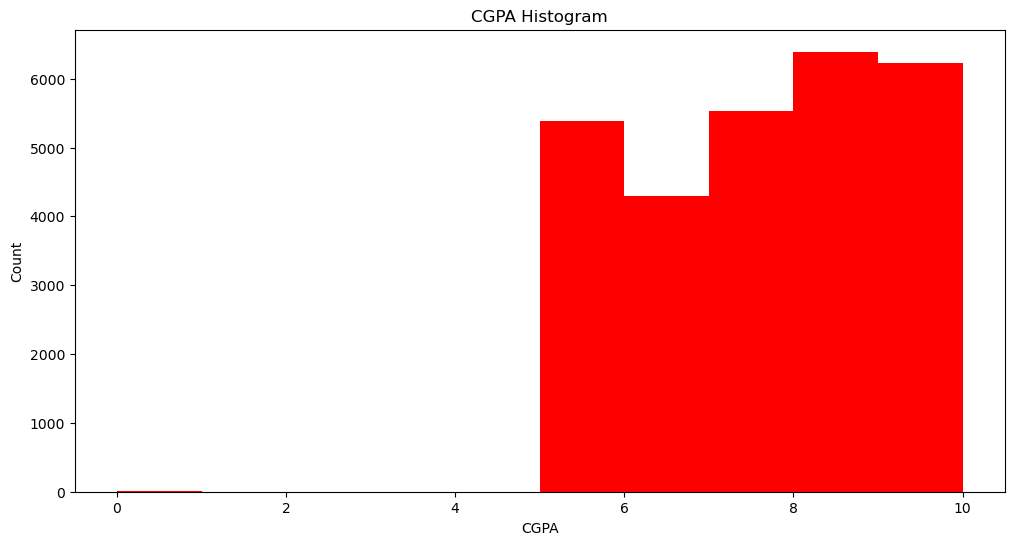

In [25]:
# CGPA
students['CGPA'].plot(kind='hist', color='red', figsize=(12, 6), bins=10)

plt.xlabel('CGPA') # adding x-label to the  bar plot
plt.ylabel('Count') # adding y-label to the bar plot
plt.title('CGPA Histogram') # adding title to the bar plot

plt.show()

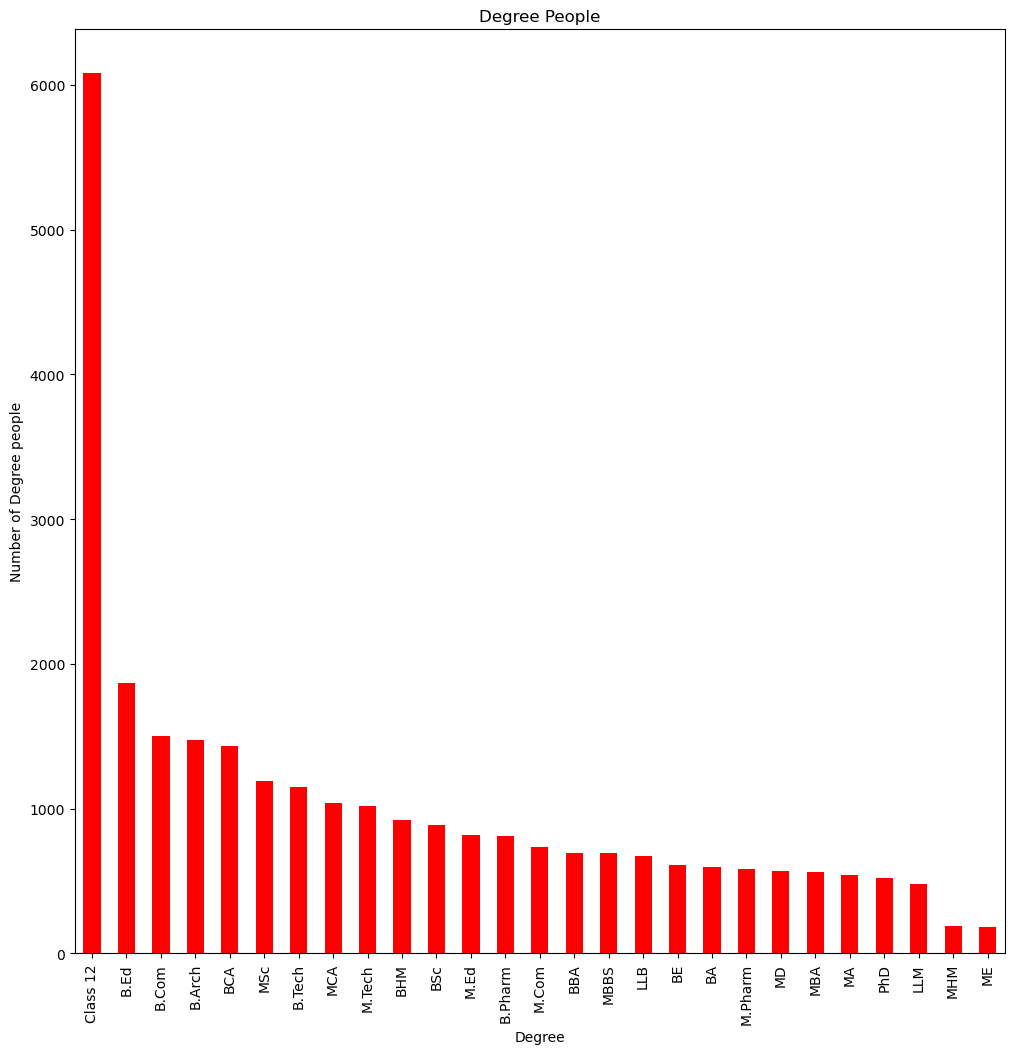

In [26]:
agrupado = students["Degree"].value_counts()

agrupado.plot(kind='bar', figsize=(12, 12), color='red')

plt.xlabel('Degree') # adding x-label to the  bar plot
plt.ylabel('Number of Degree people') # adding y-label to the bar plot
plt.title('Degree People') # adding title to the bar plot

# Annotate value labels to each country
for index, value in enumerate(agrupado):
    label = format(int(value), ',') # format in with commas

# Place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
plt.annotate(label, xy=(value - 4000, index -0.50), color='white')

plt.show()

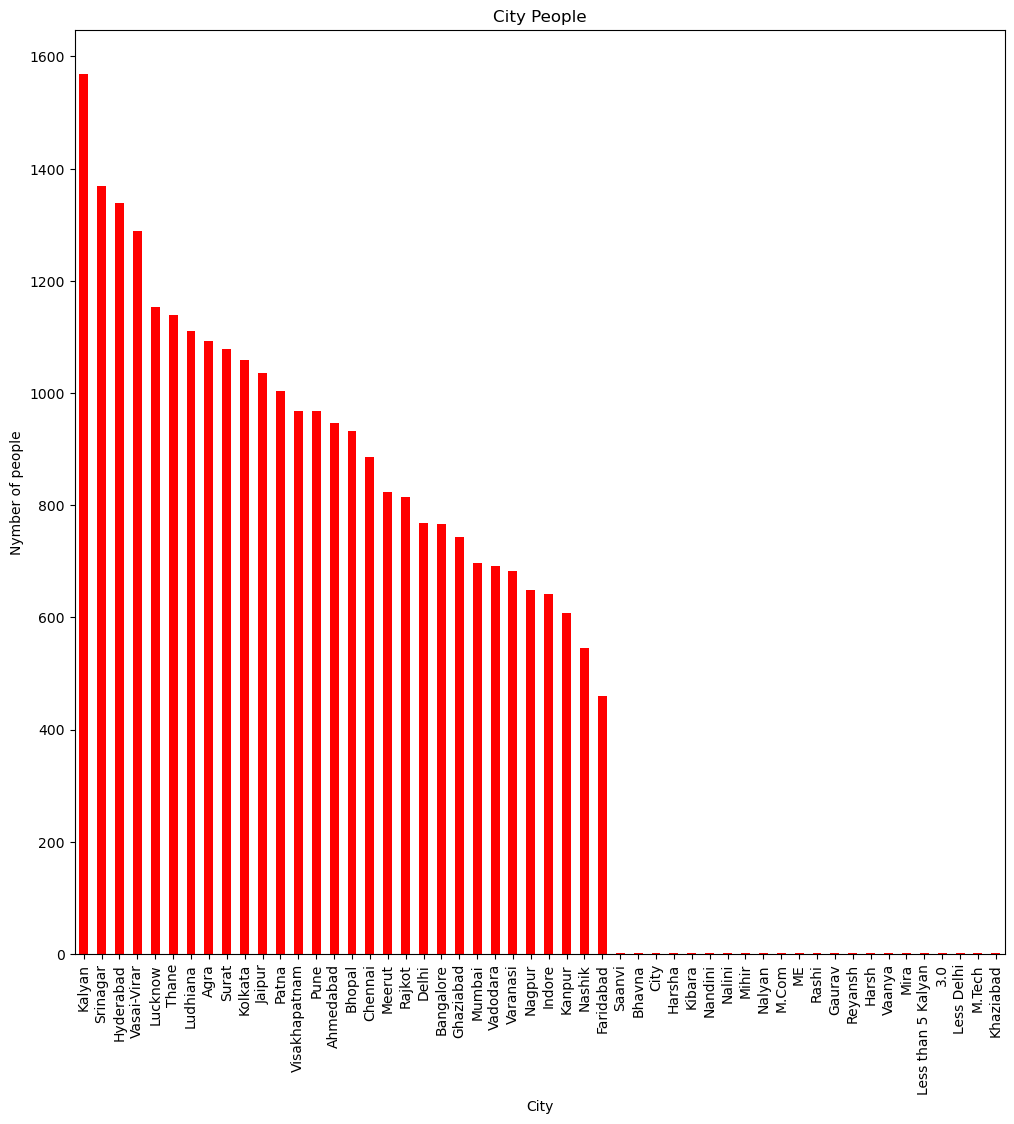

In [27]:
agrupado = students["City"].value_counts()

agrupado.plot(kind='bar', figsize=(12, 12), color='red')

plt.xlabel('City') # adding x-label to the  bar plot
plt.ylabel('Nymber of people') # adding y-label to the bar plot
plt.title('City People') # adding title to the bar plot

# Annotate value labels to each country
for index, value in enumerate(agrupado):
    label = format(int(value), ',') # format in with commas

# Place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
plt.annotate(label, xy=(value - 4000, index -0.50), color='white')

plt.show()

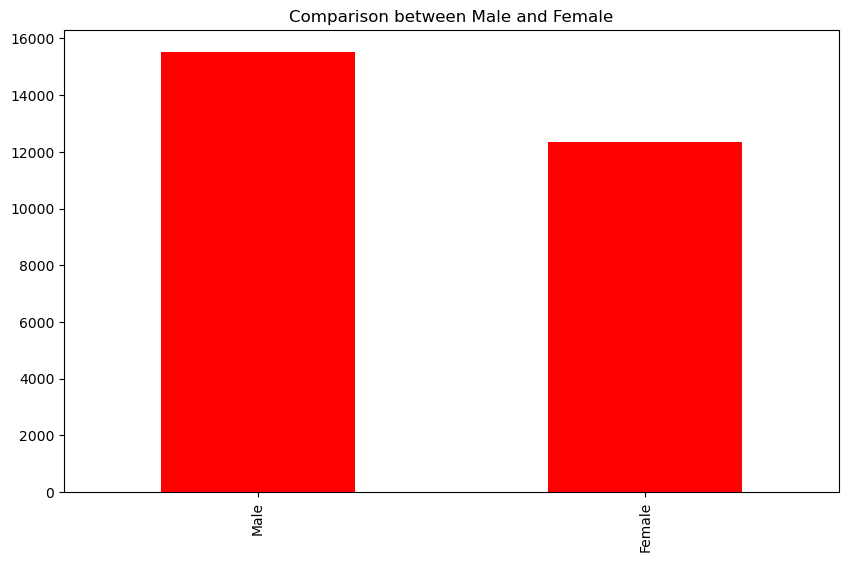

In [28]:
agrupado = students["Gender"].value_counts()

agrupado.plot(kind='bar', figsize=(10, 6), color='red')

plt.xlabel('') # adding x-label to the  bar plot
plt.ylabel('') # adding y-label to the bar plot
plt.title('Comparison between Male and Female') # adding title to the bar plot

plt.show()

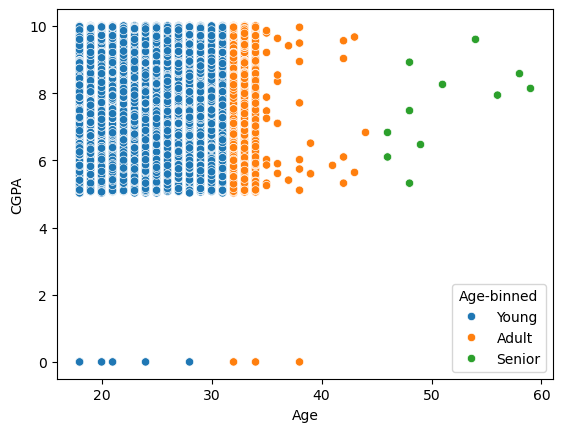

In [29]:
srn.scatterplot(x="Age", y="CGPA", hue='Age-binned', data=students)
plt.show()

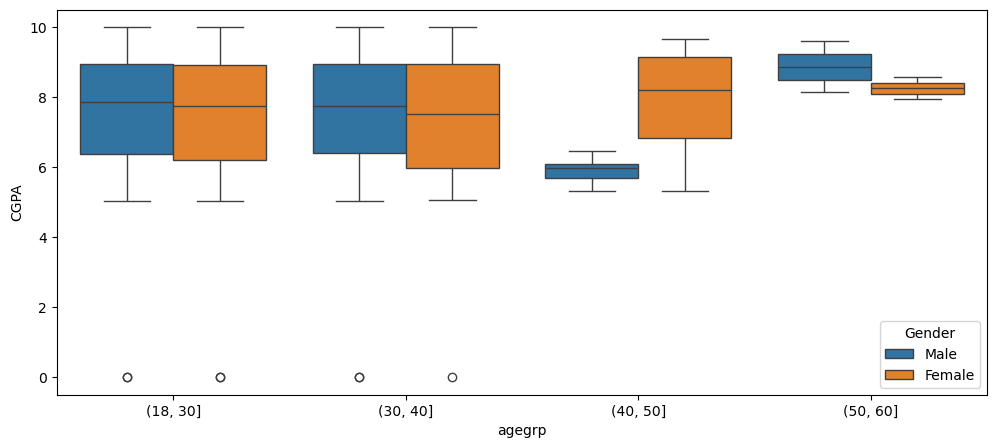

In [30]:
# Create age strata based on these cut points
students["agegrp"] = pd.cut(students.Age, [18, 30, 40, 50, 60]) 

plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
srn.boxplot(x="agegrp", y="CGPA", hue='Gender', data=students)  # Make boxplot of BPXSY1 stratified by age group

plt.show()

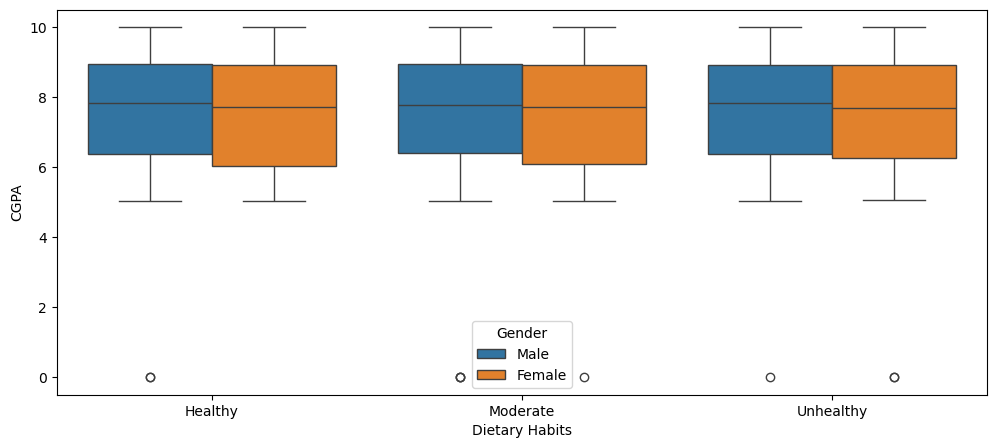

In [31]:
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
srn.boxplot(x="Dietary Habits", y="CGPA", hue='Gender', data=students)  # Make boxplot of BPXSY1 stratified by age group
plt.show()

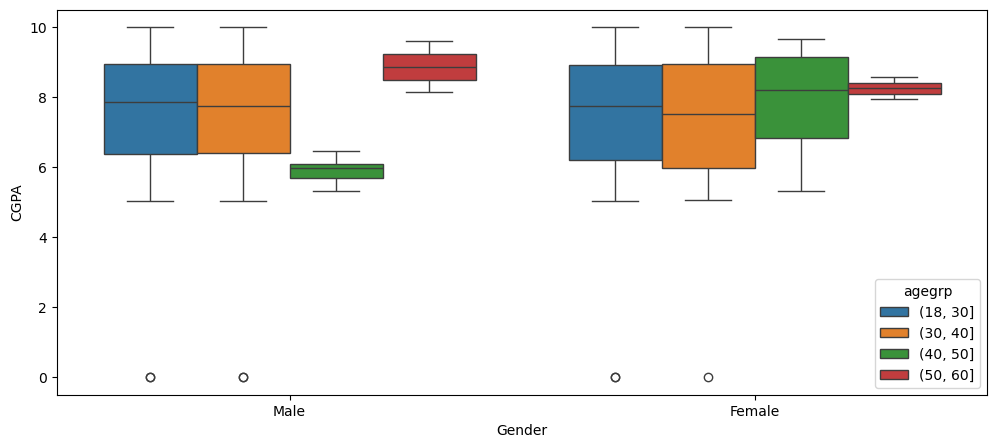

In [32]:
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
srn.boxplot(x="Gender", y="CGPA", hue='agegrp', data=students)  # Make boxplot of BPXSY1 stratified by age group

plt.show()

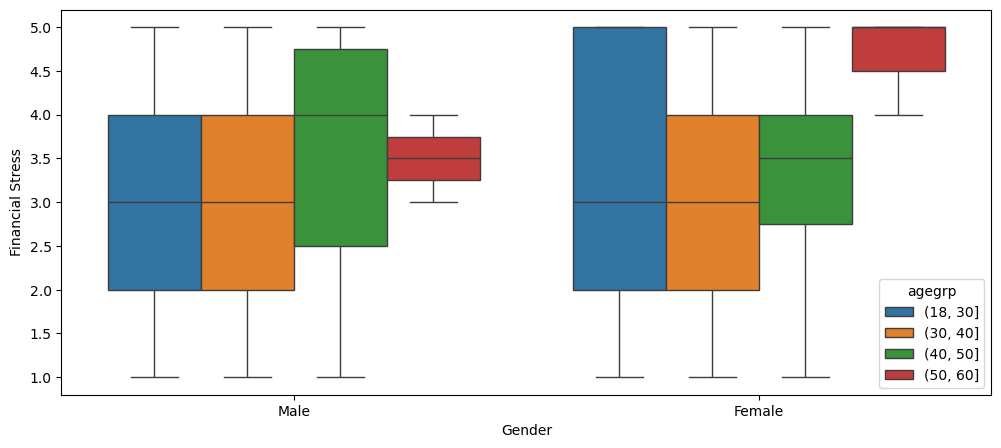

In [33]:
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
srn.boxplot(x="Gender", y="Financial Stress", hue='agegrp', data=students)  # Make boxplot of BPXSY1 stratified by age group

plt.show()

C:\Users\micro\AppData\Local\Temp\ipykernel_1636\3135985690.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupado = students.groupby("Age-binned")["Depression"].value_counts()


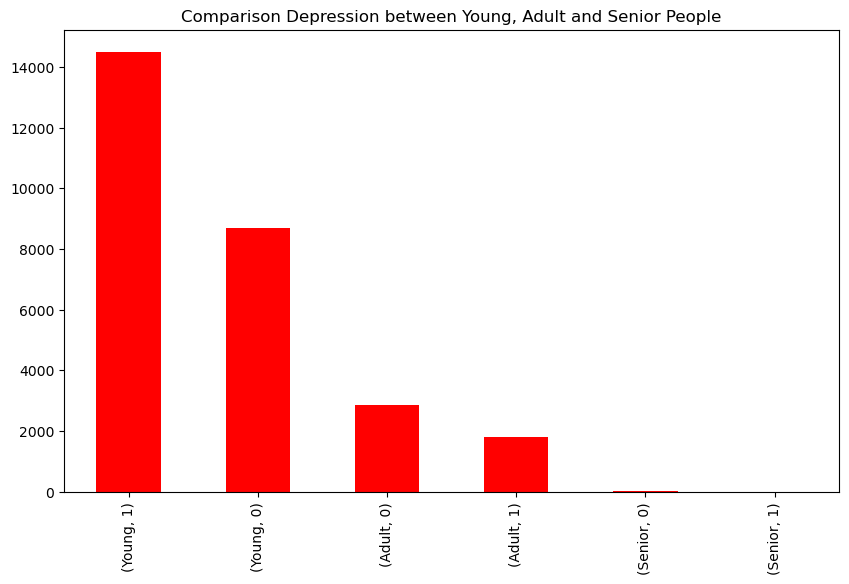

In [34]:
agrupado = students.groupby("Age-binned")["Depression"].value_counts()

agrupado.plot(kind='bar', figsize=(10, 6), color='red')

plt.xlabel('') # adding x-label to the  bar plot
plt.ylabel('') # adding y-label to the bar plot
plt.title('Comparison Depression between Young, Adult and Senior People') # adding title to the bar plot

plt.show()

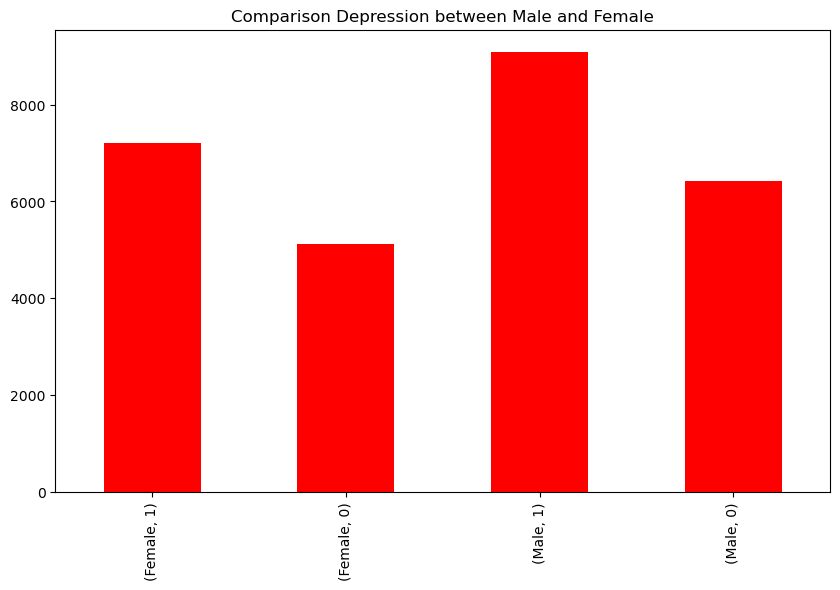

In [35]:
agrupado = students.groupby("Gender")["Depression"].value_counts()

agrupado.plot(kind='bar', figsize=(10, 6), color='red')

plt.xlabel('') # adding x-label to the  bar plot
plt.ylabel('') # adding y-label to the bar plot
plt.title('Comparison Depression between Male and Female') # adding title to the bar plot

plt.show()

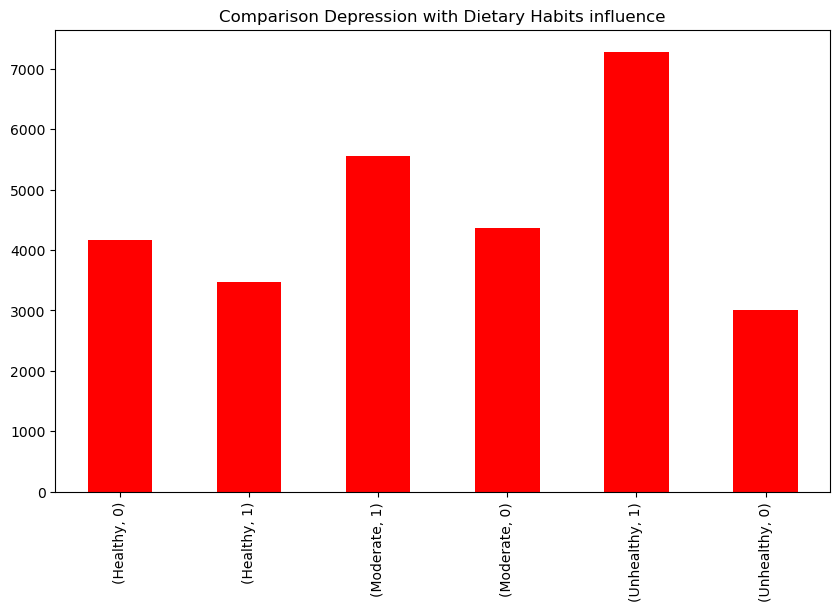

In [36]:
agrupado = students.groupby("Dietary Habits")["Depression"].value_counts()

agrupado.plot(kind='bar', figsize=(10, 6), color='red')

plt.xlabel('') # adding x-label to the  bar plot
plt.ylabel('') # adding y-label to the bar plot
plt.title('Comparison Depression with Dietary Habits influence') # adding title to the bar plot

plt.show()

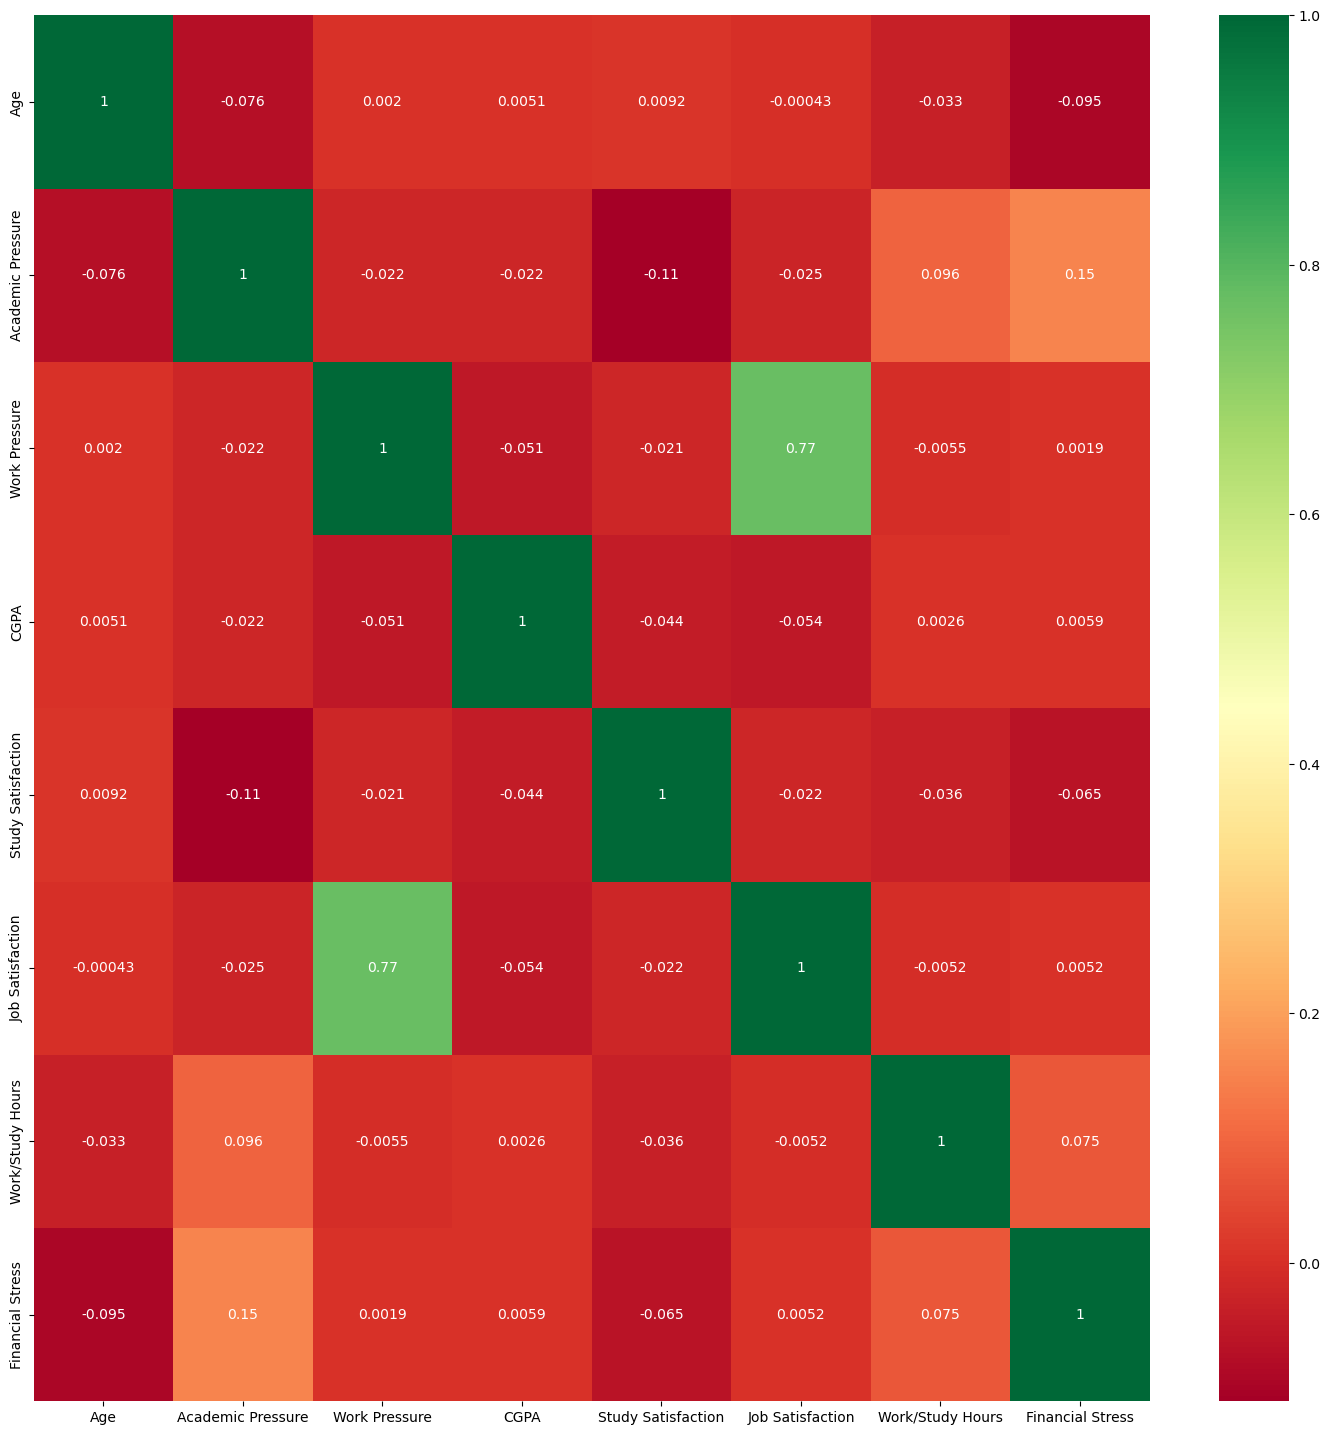

In [37]:
plt.figure(figsize=(18,18))
srn.heatmap(numeric_df.corr(),annot=True,cmap='RdYlGn')

plt.show()

## **Feature Engineering**


#### One-hot Encoding

In [38]:
one_hot_encode_cols = students.dtypes[students.dtypes == object]

In [39]:
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

students[one_hot_encode_cols].head()

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,Male,Visakhapatnam,Student,5-6 hours,Healthy,B.Pharm,Yes,No
1,Female,Bangalore,Student,5-6 hours,Moderate,BSc,No,Yes
2,Male,Srinagar,Student,Less than 5 hours,Healthy,BA,No,Yes
3,Female,Varanasi,Student,7-8 hours,Moderate,BCA,Yes,Yes
4,Female,Jaipur,Student,5-6 hours,Moderate,M.Tech,Yes,No


In [40]:
students_1 = pd.get_dummies(students, columns=one_hot_encode_cols, drop_first=True)
students_1

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,...,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,2,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1,...,False,False,False,False,False,False,False,False,True,False
1,8,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0,...,False,False,False,False,False,False,False,False,False,True
2,26,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0,...,False,False,False,False,False,False,False,False,False,True
3,30,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1,...,False,False,False,False,False,False,False,False,True,True
4,32,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,0.0,5.75,5.0,0.0,7.0,1.0,0,...,False,False,False,False,False,False,False,False,True,True
27897,140686,27.0,2.0,0.0,9.40,3.0,0.0,0.0,3.0,0,...,False,False,False,False,False,False,True,False,False,True
27898,140689,31.0,3.0,0.0,6.61,4.0,0.0,12.0,2.0,0,...,False,False,False,True,False,False,False,False,False,False
27899,140690,18.0,5.0,0.0,6.88,2.0,0.0,10.0,5.0,1,...,False,False,False,False,False,False,False,False,True,False


In [41]:
students.shape

(27851, 20)

In [42]:
students_1.shape

(27851, 111)

#### Label Enconding

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:

le = LabelEncoder()
students['Academic Pressure'] = le.fit_transform(students['Academic Pressure'])
students['Work Pressure'] = le.fit_transform(students['Work Pressure'])
students['Dietary Habits'] = le.fit_transform(students['Dietary Habits'])
students['Study Satisfaction'] = le.fit_transform(students['Study Satisfaction'])
students['Job Satisfaction'] = le.fit_transform(students['Job Satisfaction'])
students['Work/Study Hours'] = le.fit_transform(students['Work/Study Hours'])
students['Financial Stress'] = le.fit_transform(students['Financial Stress'])
students['Family History of Mental Illness'] = le.fit_transform(students['Family History of Mental Illness'])
students['Have you ever had suicidal thoughts ?'] = le.fit_transform(students['Have you ever had suicidal thoughts ?'])
students['Gender'] = le.fit_transform(students['Gender'])
students['Sleep Duration'] = le.fit_transform(students['Sleep Duration'])

students['Sleep Duration'] = students['Sleep Duration'].astype('int')
students['CGPA'] = students['CGPA'].astype('int')

### END SOLUTION

In [45]:
students

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Age-binned,agegrp
0,2,1,33.0,Visakhapatnam,Student,5,0,8,2,0,0,0,B.Pharm,1,3,0,0,1,Adult,"(30.0, 40.0]"
1,8,0,24.0,Bangalore,Student,2,0,5,5,0,0,1,BSc,0,3,1,1,0,Young,"(18.0, 30.0]"
2,26,1,31.0,Srinagar,Student,3,0,7,5,0,2,0,BA,0,9,0,1,0,Young,"(30.0, 40.0]"
3,30,0,28.0,Varanasi,Student,3,0,5,2,0,1,1,BCA,1,4,4,1,1,Young,"(18.0, 30.0]"
4,32,0,25.0,Jaipur,Student,4,0,8,3,0,0,1,M.Tech,1,1,0,0,0,Young,"(18.0, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,0,27.0,Surat,Student,5,0,5,5,0,0,2,Class 12,1,7,0,1,0,Young,"(18.0, 30.0]"
27897,140686,1,27.0,Ludhiana,Student,2,0,9,3,0,2,0,MSc,0,0,2,1,0,Young,"(18.0, 30.0]"
27898,140689,1,31.0,Faridabad,Student,3,0,6,4,0,0,2,MD,0,12,1,0,0,Young,"(30.0, 40.0]"
27899,140690,0,18.0,Ludhiana,Student,5,0,6,2,0,2,0,Class 12,1,10,4,0,1,Young,NaN


## **Criação e ajuste dos Modelos: Logistic Regression, Random Forest, SVM**

In [46]:
feature_cols = ['Sleep Duration', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Dietary Habits', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']
feature_cols

['Sleep Duration',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Dietary Habits',
 'Study Satisfaction',
 'Job Satisfaction',
 'Work/Study Hours',
 'Financial Stress',
 'Family History of Mental Illness',
 'Have you ever had suicidal thoughts ?']

**Separando os dados para treino e teste** 

In [47]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
# Usaremos esse metódo de estratificação na divisão entre treinamento e teste
# para,manter a mesma proporção de nossa classe de preditores,
# ...tanto em nosso conjunto de treinamento quando em nosso conjunto de testes.
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

next(strat_shuf_split.split(students[feature_cols], students['Depression']))

(array([ 9840,  8457, 12851, ..., 19514, 11596, 11242], dtype=int64),
 array([ 7018, 19918, 22436, ..., 27309, 17280, 12863], dtype=int64))

In [48]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
# Usaremos esse metódo de estratificação na divisão entre treinamento e teste
# para,manter a mesma proporção de nossa classe de preditores,
# ...tanto em nosso conjunto de treinamento quando em nosso conjunto de testes.
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(students[feature_cols], students.Depression))

students = students.reset_index(drop=True)

# Create the dataframes
X_train = students.iloc[train_idx].loc[:, feature_cols]
y_train = students.iloc[train_idx]['Depression']

X_test  = students.iloc[test_idx].loc[:, feature_cols]
y_test  = students.iloc[test_idx]['Depression']

In [49]:
y_train.value_counts(normalize=True)

Depression
1    0.585483
0    0.414517
Name: proportion, dtype: float64

In [50]:
y_test.value_counts(normalize=True)
### END SOLUTION

Depression
1    0.585448
0    0.414552
Name: proportion, dtype: float64

## **1-Regressão Logísitca**

In [51]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression SEM CROSS VALIDATION 
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
lr

LogisticRegression(solver='liblinear')

In [52]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression COM CROSS VALIDATION
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
lr_l1

LogisticRegressionCV(cv=4, penalty='l1', solver='liblinear')

In [53]:
# L2 regularized logistic regression COM CROSS VALIDATION 
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
lr_l2
### END SOLUTION

LogisticRegressionCV(cv=4, solver='liblinear')

In [54]:
### BEGIN SOLUTION
# Combine todos os coefficientes no Dataframe

# 1- Cria uma lista vazia para guardar os DataFrames de coeficientes dos modelos.
coefficients = list()

# 2- Define os rótulos para os modelos
# 'lr' = regressão logística padrão (sem penalização)
# 'l1' = regressão com regularização/penalização L1(Lasso)
# 'l2' = regressão com regularização/penalização L2(Ridge)
coeff_labels = ['lr', 'l1', 'l2']

# 3- Define lista com os modelos já treinados
# lr - modelo sem regularização 
# lr_l1 - com L1
# lr_l2 - com L2 
coeff_models = [lr, lr_l1, lr_l2]


# 4- Loop para cada modelo e rótulo correspondente
# Itera sobre os rótulos (lab) e modelos (mod) ao mesmo tempo usando zip.
for lab, mod in zip(coeff_labels, coeff_models):


    # 5- Obtém os coeficientes do modelo atual
    # Extrai os coeficientes do modelo(mod), que retornam um array do tipo (1, n_features).
    coeffs = mod.coef_

    # 6- Cria rótulos hierárquicos (MultiIndex)
    # Cria um MultiIndex com dois níveis: 
    
    # * Primeiro Nível: nome do modelo (lab, ex: 'lr')

    # * Segundo nível: índices de 0 a 1 (assumindo 2 classes ou 2 conjuntos de coeficientes)
    
    # * codes = indica como construir as combinações:
    #    * [0, 0]: repete o mesmo rótulo de modelo 2 vezes 
    #    * [0, 1]: varia o índice da classe ou da saída

    
    coeff_label = pd.MultiIndex(levels=[[lab], [0]], 
                                 codes=[[0], [0]])
    
    # 7- Cria um DataFrame com os coeficientes transpostos 
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))
    

    
    # * 'coeffs.T': transposição para que as linhas representem features e colunas representem classes/modelos. 
    
    # * pd.DataFrame(..., columns=coeff_label): cria o DataFrame com colunas rotuladas pelo MultiIndex.
    
    # * append(..): adiiona o DataFrame à lista 'coefficients'.
    
# 8. Concatena todos os coeficientes lado a lado 
coefficients = pd.concat(coefficients, axis=1)

# Junta todos os DataFrames da lista coefficients horizontalmente (colunas).
# Resultado: um DataFrame com os coeficientes de todos os modelos, com colunas hierárquicas (modelo → classe).

# 9. Mostra uma amostra aletória de 10 linhas 

# Exibe 10 amostras aleatórias(10 features com seus respectivos coeficientes para cada modelo).
coefficients.sample(10)


,lr,l1,l2
,0,0,0
0,-0.039008,-0.040723,-0.035312
7,0.110324,0.104459,0.112121
5,-0.230705,-0.236178,-0.226520
10,2.436745,2.359843,2.453944
1,0.809225,0.779746,0.817078
2,0.121116,0.000000,0.829138
4,0.548834,0.516001,0.555116
8,0.552681,0.533953,0.557221
3,0.051582,0.020421,0.061430


In [55]:
print("Shape dos coeficientes:", coeffs.shape)
print("Shape dos coeficientes:", coefficients.shape)
print("Classes no y_train:", np.unique(y_train))
print(lr.classes_)
print(lr_l1.classes_)
print(lr_l2.classes_)

Shape dos coeficientes: (1, 11)
Shape dos coeficientes: (11, 3)
Classes no y_train: [0 1]
[0 1]
[0 1]
[0 1]


In [56]:
print(coefficients.columns.get_level_values(1).unique())

Index([0], dtype='int64')


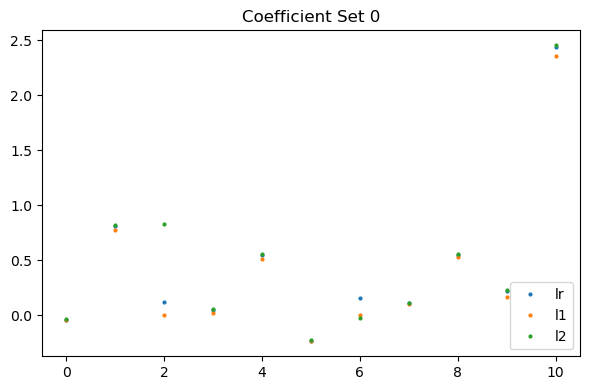

In [57]:
fig, ax = plt.subplots(figsize=(6, 4))  # Só 1 gráfico

# Extrai os dados da classe 0
data = coefficients.xs(0, level=1, axis=1)

# Plota os coeficientes
data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)

ax.legend(loc=4)
ax.set(title='Coefficient Set 0')

plt.tight_layout()
plt.show()

In [58]:
# Imprime o número de rótulos minímos. 
print(y_train.nunique())

2


In [59]:
## BEGIN SOLUTION
# Prever a class e a probabilidade de cada registro no X_test
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

# Loop para cada modelo e rótulo correspondente
# Itera sobre os rótulos (lab) e modelos (mod) ao mesmo tempo usando zip.
for lab, mod in zip(coeff_labels, coeff_models):
    
    # mod.predict(X_test): retorna as classes previstas pelo modelo para cada exemplo de teste (ex: [0, 1, 1, 0, ...]).
    # pd.Series(..., name=lab): transforma esse vetor em uma série pandas com o nome lab (ex: 'lr').
    # y_pred.append(...): adiciona essa série à lista y_pred.
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    
    # mod.predict_proba(X_test): retorna as probabilidades previstas para cada classe.
    # .max(axis=1): pega a maior probabilidade de cada linha, ou seja, a probabilidade da classe prevista
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,0,0,0
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


y_pred.lr != y_pred.l1

Agora iremos comparar linha a linha os valores nas colunas lr e l1 dentro do DataFrame y_pred.

Isso irá retorna uma série booleana com True(1) onde os valores são diferentes e False(0) onde são iguais.

O DataFrame y_pred é então filtrado com base nessa condição booleana.

Ou seja, ele retorna apenas as linhas onde os valores de lr e l1 são diferentes.

In [60]:
y_pred[y_pred.lr != y_pred.l1]

,lr,l1,l2
252,1,0,1
272,0,1,0
377,0,1,0
615,1,0,1
701,1,0,1
732,0,1,0
739,0,1,0
889,0,1,0
1246,0,1,0
1266,0,1,0


In [61]:
y_pred[y_pred.l1 != y_pred.l2]

,lr,l1,l2
252,1,0,1
272,0,1,0
377,0,1,0
443,0,0,1
615,1,0,1
...,...,...,...
7677,0,1,0
7892,0,0,1
7942,1,1,0
8141,0,1,0


In [62]:
y_pred[y_pred.l2 != y_pred.lr]

,lr,l1,l2
443,0,0,1
1039,1,1,0
3376,1,1,0
3516,0,0,1
3525,0,0,1
3563,1,1,0
3692,1,1,0
3733,1,1,0
3822,0,1,1
3884,1,1,0


In [63]:
# Irá imprimir um dataframe com as probabilidades da classe que foi prevista
y_prob.head()
### END SOLUTION

,lr,l1,l2
0,0.700681,0.694862,0.701397
1,0.905239,0.901070,0.905105
2,0.986863,0.984310,0.987405
3,0.813503,0.802132,0.816060
4,0.974503,0.971442,0.975274


In [64]:
score(y_test, y_pred[lab], average='weighted')

(0.8443716769727148, 0.8447821924365725, 0.8438597991800404, None)

In [65]:
label_binarize(y_test, classes=[0,1])

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [66]:
metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    
    # 1. label_binarize(...):
    # Transforma as classes multiclasses (0 a 1) em formato binário (também chamado de one-hot encoding),
    # necessário para calcular ROC-AUC em tarefas multiclasses.
    
    # 2. roc_auc_score(...)
    # Calcula a métrica ROC-AUC (Área sob a Curva ROC). 
    # Essa métrica mede a capacidade do modelo de distinguir entre as classes.
         # *average='weighted': faz média ponderada do AUC para cada classe, levando em conta o número de amostras de cada classe. 
         #                      Útil para dados desbalanceados.
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    # 'confusion_matrix(y_test, y_pred[lab])': calcula a matriz de confusão, 
    # que mostra quantas vezes o modelo previu corretamente ou errou cada classe.
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [67]:
metrics

,lr,l1,l2
precision,0.843171,0.842117,0.844372
recall,0.843585,0.842508,0.844782
fscore,0.842638,0.841504,0.843860
accuracy,0.843585,0.842508,0.844782
auc,0.833761,0.832419,0.835078


C:\Users\micro\AppData\Local\Temp\ipykernel_1636\428476922.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=4)


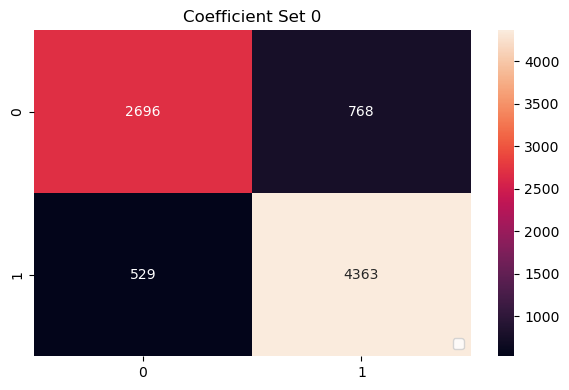

In [68]:
fig, ax = plt.subplots(figsize=(6, 4)) 

srn.heatmap(cm[lab], ax=ax, annot=True, fmt='d')

ax.legend(loc=4)
ax.set(title='Coefficient Set 0')

plt.tight_layout()
plt.show()

## **2-Random Forest**

Esta função calculará a precisão dos dados de treinamento e teste fornecidos por um modelo.

In [69]:
from sklearn.ensemble import RandomForestClassifier

Esta função calcula a correlação média entre preditores e exibe a correlação em pares entre preditores.

In [70]:
def get_correlation(X_test2, y_test2, models):
    
    # Essa função calcula a média da correlação entre preditores. 
    n_estimators=len(models.estimators_)
    prediction=np.zeros((y_test.shape[0],n_estimators))
    predictions=pd.DataFrame({'estimator '+str(n+1):[] for n in range(n_estimators)})
    
    for key,model in zip(predictions.keys(),models.estimators_):
        predictions[key]=model.predict(X_test2.to_numpy())
    
    corr=predictions.corr()

    print("Average correlation between predictors: ", corr.mean().mean()-1/n_estimators)
    return corr

### Selecionar Variáveis ​

Iremos criar uma outra variável de entrada devido a alteração do modelo

In [71]:
X = students[['Sleep Duration', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Dietary Habits', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']]
X

,Sleep Duration,Academic Pressure,Work Pressure,CGPA,Dietary Habits,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Family History of Mental Illness,Have you ever had suicidal thoughts ?
0,0,5,0,8,0,2,0,3,0,0,1
1,0,2,0,5,1,5,0,3,1,1,0
2,2,3,0,7,0,5,0,9,0,1,0
3,1,3,0,5,1,2,0,4,4,1,1
4,0,4,0,8,1,3,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
27846,0,5,0,5,2,5,0,7,0,1,1
27847,2,2,0,9,0,3,0,0,2,1,0
27848,0,3,0,6,2,4,0,12,1,0,0
27849,2,5,0,6,0,2,0,10,4,0,1


In [72]:
M = X.shape[1]
M

11

Vamos definir X e y para nosso conjunto de dados:

In [73]:
y = students['Depression']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Depression, dtype: int64

## Treino/Teste dataset

In [74]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split( X, y, test_size=0.3, random_state=1)
print ('Train set', X_train2.shape,  y_train2.shape)
print ('Test set', X_test2.shape,  y_test2.shape)

Train set (19495, 11) (19495,)
Test set (8356, 11) (8356,)


In [75]:
n_estimators = 11

<code>max_features</code> $m$ o número de recursos a serem considerados ao procurar a melhor divisão. Se tivermos M recursos denotados por:

In [76]:
M_features=X.shape[1]

In [77]:
max_features=round(np.sqrt(M_features))-1
max_features

2

In [78]:
y_test2

1745     1
5344     0
5463     0
18952    0
18960    1
        ..
7833     1
23893    0
23481    0
25886    1
17357    0
Name: Depression, Length: 8356, dtype: int64

Criamos um objeto de Random Forest e treinamo-lo:

In [79]:
model = RandomForestClassifier( max_features=max_features,n_estimators=n_estimators, random_state=0)
model.fit(X_train2, y_train2)

RandomForestClassifier(max_features=2, n_estimators=11, random_state=0)

Obtemos a precisão do treinamento e dos testes; vemos que o RF tem um desempenho melhor que o Bagging:

A função abaixo calculará a precisão dos dados de treinamento e teste fornecidos por um modelo.

In [80]:
def get_accuracy(X_train2, X_test2, y_train2, y_test2, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test2, model.predict(X_test2)),"train Accuracy": metrics.accuracy_score(y_train2, model.predict(X_train2))}

In [84]:
print(get_accuracy(X_train2, X_test2, y_train2, y_test2, model))

{'test Accuracy': 0.802058401148875, 'train Accuracy': 0.986098999743524}


In [85]:
get_correlation(X_test2, y_test2,model).style.background_gradient(cmap='coolwarm')

Average correlation between predictors:  0.47187794621881696


,estimator 1,estimator 2,estimator 3,estimator 4,estimator 5,estimator 6,estimator 7,estimator 8,estimator 9,estimator 10,estimator 11
estimator 1,1.000000,0.510136,0.512530,0.516611,0.486343,0.513946,0.516729,0.509121,0.510032,0.526622,0.503933
estimator 2,0.510136,1.000000,0.523120,0.521900,0.514295,0.515277,0.516713,0.527253,0.506845,0.526965,0.511382
estimator 3,0.512530,0.523120,1.000000,0.530155,0.509783,0.527437,0.520667,0.518331,0.525743,0.530776,0.518350
estimator 4,0.516611,0.521900,0.530155,1.000000,0.520784,0.524240,0.532033,0.532751,0.511430,0.531011,0.520758
estimator 5,0.486343,0.514295,0.509783,0.520784,1.000000,0.524504,0.517006,0.511343,0.496964,0.526354,0.513620
estimator 6,0.513946,0.515277,0.527437,0.524240,0.524504,1.000000,0.523475,0.534513,0.519504,0.535210,0.524067
estimator 7,0.516729,0.516713,0.520667,0.532033,0.517006,0.523475,1.000000,0.533382,0.516736,0.504096,0.512723
estimator 8,0.509121,0.527253,0.518331,0.532751,0.511343,0.534513,0.533382,1.000000,0.509940,0.529959,0.531469
estimator 9,0.510032,0.506845,0.525743,0.511430,0.496964,0.519504,0.516736,0.509940,1.000000,0.520882,0.510996
estimator 10,0.526622,0.526965,0.530776,0.531011,0.526354,0.535210,0.504096,0.529959,0.520882,1.000000,0.527869


Usaremos o <code>GridSearchCV</code> para pesquisar valores de parâmetros especificados do modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV

Criamos um objeto <code>RandomForestClassifier</code> e listamos os parâmetros usando o método <code>get_params()</code>:

In [ ]:
model2 = RandomForestClassifier()
model2.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Podemos usar o GridSearch para busca exaustiva sobre valores de parâmetros especificados. Vemos que muitos dos parâmetros são semelhantes a árvores de classificação; vamos tentar um parâmetro diferente para <code>max_depth</code>, <code>max_features</code> e <code>n_estimators</code>.

In [ ]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}

Criamos o objeto Grid Search e o ajustamos:

In [ ]:
search = GridSearchCV(estimator=model2, param_grid=param_grid,scoring='accuracy')
search.fit(X_train2, y_train2)

C:\Users\micro\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1000 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\micro\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\micro\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\micro\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in _validate_params
    v

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

Podemos ver que a melhor pontuação de precisão dos parâmetros pesquisados ​​foi de \~84%.

In [ ]:
search.best_score_

0.8407283918953578

Os melhores valores de parâmetros são:

In [ ]:
search.best_params_

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 31}

Podemos calcular a precisão dos dados de teste usando os dados de teste:

In [ ]:
print(get_accuracy(X_train2, X_test2, y_train2, y_test2, search.best_estimator_))

{'test Accuracy': 0.8214456677836285, 'train Accuracy': 0.8448320082072326}


## **Conclusão**: 

Tanto o modelo de Regressão Logística (com e sem regularização) quanto o modelo de Random Forest apresentaram uma acurácia consistente na faixa de 80% a 85%, tanto nos conjuntos de treinamento quanto de teste.

Esses resultados indicam um desempenho estável e razoável, sugerindo que tais modelos têm potencial para aplicação preliminar no diagnóstico de indícios de depressão em jovens estudantes.

Ressalta-se, no entanto, que para um uso clínico ou decisório mais robusto, recomenda-se validação com conjuntos de dados mais diversos e o uso de técnicas de interpretação, como SHAP ou LIME, a fim de garantir transparência e equidade nas previsões.
